# Project 4 - Predictive Analysis using scikit-learn
#### from: Assignment 12 – Preprocessing Data for scikit-learn

#### Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis. In this assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4. 

### Mushrooms Dataset 
#### A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking. For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

- Study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!

#### Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

- Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.

In [1]:
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt

df = pd.read_fwf("agaricus-lepiota.data", header=None)
df

,0
0,"p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u"
1,"e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g"
2,"e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m"
3,"p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u"
4,"e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g"
...,...
8119,"e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l"
8120,"e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l"
8121,"e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l"
8122,"p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l"


In [2]:
new_df = df[0].str.split(',',expand=True)

new_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


- Add meaningful names for each column.

In [3]:
headers = ['Edible or Poisonous?', 'Cap Shape', 'Cap Surface', 'Cap Color', 'Bruises?', 'Odor', 'Gill Attachment', 'Gill Spacing', 'Gill Size', 'Gill Color', 'Stalk Shape', 'Stalk Root', 'Stalk Surface Above Ring', 'Stalk Surface Below Ring', 'Stalk Color Above Ring', 'Stalk Color Below Ring', 'Veil Type', 'Veil Color', 'Ring Number', 'Ring Type', 'Spore Print Color', 'Population', 'Habitat']
new_df.columns = headers
new_df

,Edible or Poisonous?,Cap Shape,Cap Surface,Cap Color,Bruises?,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
trimmed_df = new_df[['Edible or Poisonous?', 'Odor', 'Cap Color']].copy()
trimmed_df

,Edible or Poisonous?,Odor,Cap Color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g
...,...,...,...
8119,e,n,n
8120,e,n,n
8121,e,n,n
8122,p,y,n


- Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.

In [5]:
trimmed_df['Edible or Poisonous?'] = trimmed_df['Edible or Poisonous?'].replace({'p':'poisonous', 'e':'edible'}, regex=True)
trimmed_df['Odor'] = trimmed_df['Odor'].replace({'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul', 'm':'musty','n':'none','p':'pungent','s':'spicy'}, regex=True)
trimmed_df['Cap Color'] = trimmed_df['Cap Color'].replace({'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'}, regex=True)

trimmed_df

,Edible or Poisonous?,Odor,Cap Color
0,poisonous,pungent,brown
1,edible,almond,yellow
2,edible,anise,white
3,poisonous,pungent,white
4,edible,none,gray
...,...,...,...
8119,edible,none,brown
8120,edible,none,brown
8121,edible,none,brown
8122,poisonous,fishy,brown


- Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.

In [6]:
trimmed_df['Edible or Poisonous?'].value_counts(normalize=True)

edible       0.517971
poisonous    0.482029
Name: Edible or Poisonous?, dtype: float64

In [7]:
trimmed_df['Odor'].value_counts(normalize=True)

none        0.434269
foul        0.265879
spicy       0.070901
fishy       0.070901
almond      0.049237
anise       0.049237
pungent     0.031512
creosote    0.023634
musty       0.004431
Name: Odor, dtype: float64

In [8]:
trimmed_df['Cap Color'].value_counts(normalize=True)

brown       0.281142
gray        0.226489
red         0.184638
yellow      0.131955
white       0.128016
buff        0.020679
pink        0.017725
cinnamon    0.005416
green       0.001969
purple      0.001969
Name: Cap Color, dtype: float64

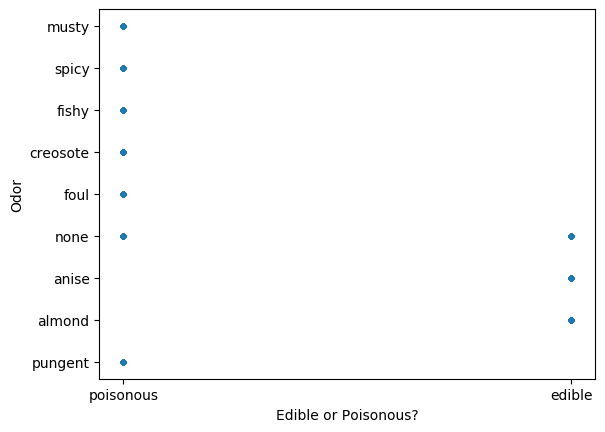

In [9]:
trimmed_df.plot.scatter(x='Edible or Poisonous?', y='Odor', s=10)
plt.show()

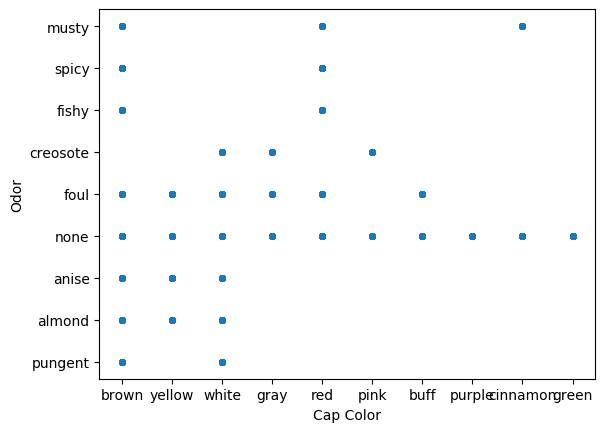

In [10]:
trimmed_df.plot.scatter(x='Cap Color', y='Odor', s=15)
plt.show()

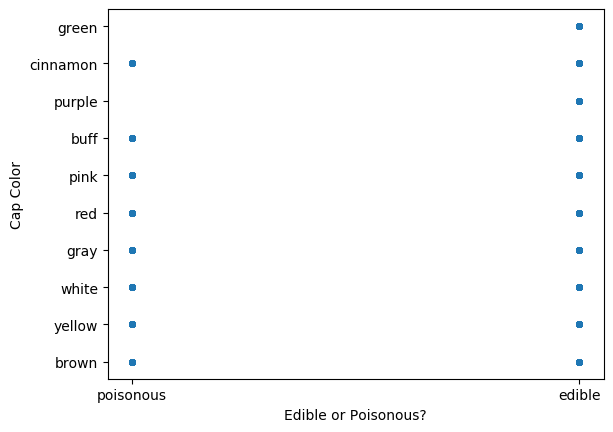

In [11]:
trimmed_df.plot.scatter(x='Edible or Poisonous?', y='Cap Color', s=15)
plt.show()

- Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

#### Based on these parameters alone, it seems nearly impossible to extrapolate which specific mushroom would be edible or poisonous. This would require analysis of many more parameters including comparing which characteristics occur most/least in both edible and poisonous mushrooms

In [12]:
dummy_df = pd.get_dummies(trimmed_df, columns=['Odor','Cap Color'])
dummy_df

,Edible or Poisonous?,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy,Cap Color_brown,Cap Color_buff,Cap Color_cinnamon,Cap Color_gray,Cap Color_green,Cap Color_pink,Cap Color_purple,Cap Color_red,Cap Color_white,Cap Color_yellow
0,poisonous,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,edible,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,edible,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,poisonous,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,edible,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8120,edible,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8121,edible,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8122,poisonous,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


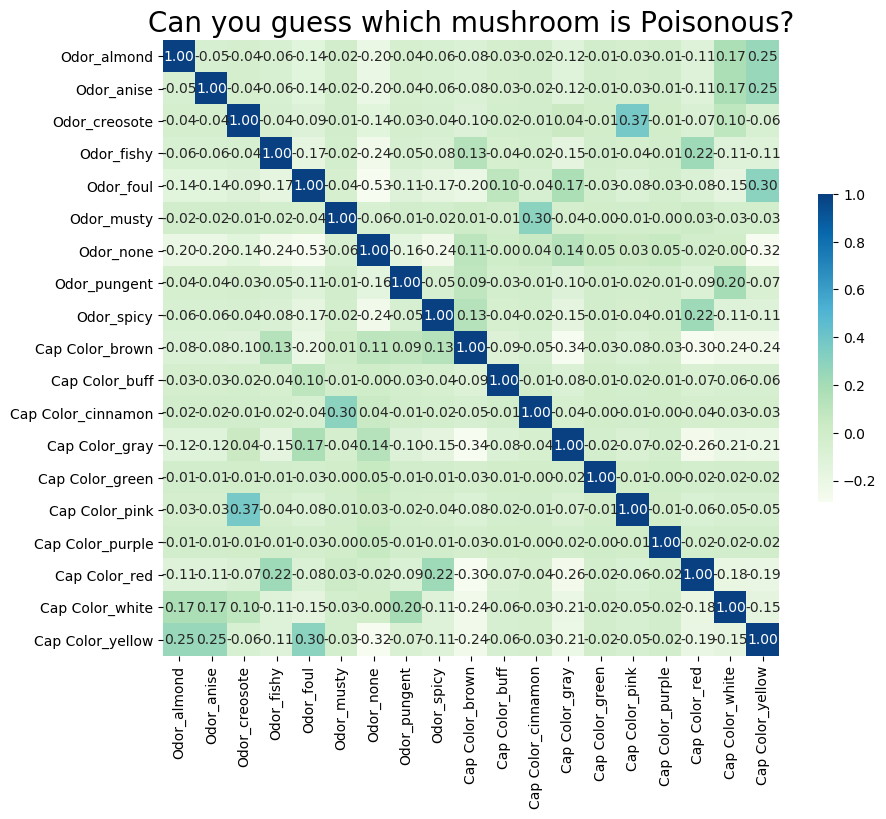

In [13]:
import seaborn as sns

correlation_matrix = dummy_df.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Can you guess which mushroom is Poisonous?', fontsize=20)
plt.show()

In [14]:
dummy_df['Edible or Poisonous?'] = dummy_df['Edible or Poisonous?'].replace(to_replace=['edible', 'poisonous'], value=[1, 0])

dummy_df

,Edible or Poisonous?,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy,Cap Color_brown,Cap Color_buff,Cap Color_cinnamon,Cap Color_gray,Cap Color_green,Cap Color_pink,Cap Color_purple,Cap Color_red,Cap Color_white,Cap Color_yellow
0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8121,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8122,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

X = dummy_df.drop(['Edible or Poisonous?'], axis=1)  
y = dummy_df["Edible or Poisonous?"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)  

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

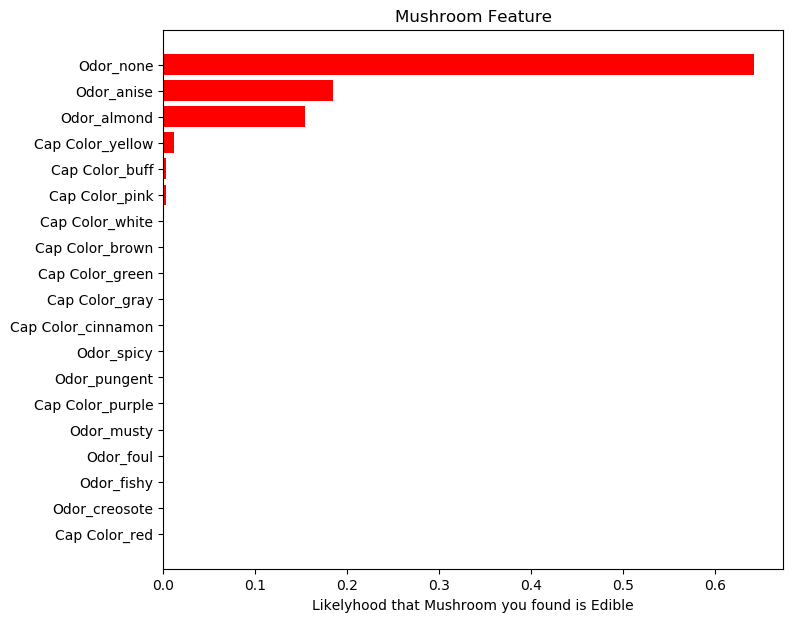

In [20]:
import numpy as np

features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Likelyhood that Mushroom you found is Edible')
plt.title('Mushroom Feature')
plt.draw()
plt.show()

### Based on the above Matrix and Graph, Color and Odor alone do not seem to provide enough information to determine whether or not a mushroom is safe though Odorless mushrooms do have a high liklihood of being edible

#### Reference used: https://github.com/kanchitank/Mushroom-Classification